# MNIST convolutional neural networks

* MNIST data를 가지고 **convolutional neural networks**를 만들어보자.
* [`tf.layers`](https://www.tensorflow.org/api_docs/python/tf/layers) API를 가지고 convolutional neural networks를 직접 구현해보자.

### Import modules

In [1]:
"""A very simple MNIST classifier.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

import tensorflow as tf

sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

np.random.seed(219)
tf.set_random_seed(219)

### Import data

In [2]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.mnist.load_data()

train_data = train_data / 255.
train_labels = np.asarray(train_labels, dtype=np.int32)

test_data = test_data / 255.
test_labels = np.asarray(test_labels, dtype=np.int32)

In [3]:
type(train_data[0])

numpy.ndarray

### Show the MNIST

label = 3


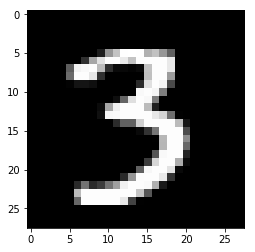

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = 10000
print("label = {}".format(train_labels[index]))
plt.imshow(train_data[index].reshape(28, 28), cmap='gray')
plt.show()

### Set up dataset with `tf.data`

#### create input pipeline with `tf.data.Dataset`

In [5]:
batch_size = 32

# for train
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(buffer_size = 10000)
train_dataset = train_dataset.batch(batch_size = batch_size)
print(train_dataset)

# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.shuffle(buffer_size = 10000)
test_dataset = test_dataset.batch(batch_size = len(test_data))
print(test_dataset)

<BatchDataset shapes: ((?, 28, 28), (?,)), types: (tf.float64, tf.int32)>
<BatchDataset shapes: ((?, 28, 28), (?,)), types: (tf.float64, tf.int32)>


#### Define Iterator

In [6]:
# tf.data.Iterator.from_string_handle의 output_shapes는 default = None이지만 꼭 값을 넣는 게 좋음
handle = tf.placeholder(tf.string, shape=[])
iterator = tf.data.Iterator.from_string_handle(handle,
                                               train_dataset.output_types,
                                               train_dataset.output_shapes)
x, y = iterator.get_next()
x = tf.cast(x, dtype = tf.float32)
y = tf.cast(y, dtype = tf.int32)

### Create the model

In [7]:
def cnn_model_fn(x):
  """Model function for CNN.
  Args:
    x: input images
    mode: boolean whether trainig mode or test mode
    
  Returns:
    logits: unnormalized score funtion
  """
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(x, [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  # 여기를 직접 채워 넣으시면 됩니다.
  conv1 = tf.layers.conv2d(input_layer, filters=32, kernel_size=[5,5], 
                           padding='SAME', activation=tf.nn.relu, name='conv1')

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  # 여기를 직접 채워 넣으시면 됩니다.
  pool1 = tf.layers.max_pooling2d(conv1, pool_size=2, strides=2, name='pool1')

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  # 여기를 직접 채워 넣으시면 됩니다.
  conv2 = tf.layers.conv2d(pool1, filters=64, kernel_size=[5,5], 
                          padding='SAME', activation=tf.nn.relu, name='conv2')

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  # 여기를 직접 채워 넣으시면 됩니다.
  pool2 = tf.layers.max_pooling2d(conv2, pool_size=2, strides=2, name='pool2')

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]
  # 여기를 직접 채워 넣으시면 됩니다.
  pool2_flat = tf.reshape(pool2, shape=[-1, 7*7*64])

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  # 여기를 직접 채워 넣으시면 됩니다.
  dense = tf.layers.dense(pool2_flat, units= 1024, activation=tf.nn.relu, name='fc1')

  # Add dropout operation; 0.6 probability that element will be kept
  is_training = tf.placeholder(tf.bool)
  # 여기를 직접 채워 넣으시면 됩니다.
  dropout = tf.layers.dropout(dense, rate=0.6, training=is_training, name='dropout')

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  # 여기를 직접 채워 넣으시면 됩니다.
  logits = tf.layers.dense(dropout, 10, name='logits')
  
  return logits, is_training, input_layer

### Build the model

In [8]:
logits, is_training, x_image = cnn_model_fn(x)

### Define loss and optimizer

In [9]:
# 여기를 직접 채워 넣으시면 됩니다.
y_one_hot = tf.one_hot(y, 10)
cross_entropy = tf.reduce_mean(tf.losses.softmax_cross_entropy(onehot_labels=y_one_hot, logits=logits))
# tf.losses.softmax_cross_entropy와
# tf.losses.sparse_softmax_cross_entropy의 차이점은?

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

### Assign `tf.summary.FileWriter`

In [10]:
graph_location = 'graphs/01_mnist_cnn_with_tf_layers'
print('Saving graph to: %s' % graph_location)
train_writer = tf.summary.FileWriter(graph_location)
train_writer.add_graph(tf.get_default_graph())

Saving graph to: graphs/01_mnist_cnn_with_tf_layers


### `tf.summary`

In [11]:
with tf.name_scope('summaries'):
  tf.summary.scalar('loss/cross_entropy', cross_entropy)
  tf.summary.image('images', x_image)
  for var in tf.trainable_variables():
    tf.summary.histogram(var.op.name, var)
  # merge all summaries
  summary_op = tf.summary.merge_all()

### `tf.Session()` and train

In [15]:
import time

sess = tf.Session(config=sess_config)
sess.run(tf.global_variables_initializer())

# train_iterator
train_iterator = train_dataset.make_initializable_iterator()
train_handle = sess.run(train_iterator.string_handle())

# Train
max_epochs = 2
step = 0
for epochs in range(max_epochs):
  # 여기를 직접 채워 넣으시면 됩니다.
  sess.run(train_iterator.initializer)

  start_time = time.time()
  while True:
    try:
      # 여기를 직접 채워 넣으시면 됩니다.
      _, loss = sess.run([train_step, cross_entropy], feed_dict={handle:train_handle, is_training:True})
      if step % 100 == 0:
        print("step: %d, loss: %g" % (step, loss))
        
        # summary
        # 여기를 직접 채워 넣으시면 됩니다.
        summary_str = sess.run(summary_op, feed_dict={handle:train_handle, is_training:True})
        train_writer.add_summary(summary_str, global_step=step)
        
      step += 1

    except tf.errors.OutOfRangeError:
      print("End of dataset")  # ==> "End of dataset"
      break
      
    print("Epochs: {} Elapsed time: {}".format(epochs, time.time() - start_time))

train_writer.close()
print("training done!")

step: 0, loss: 2.3526
Epochs: 0 Elapsed time: 0.714019775390625
Epochs: 0 Elapsed time: 0.7888193130493164
Epochs: 0 Elapsed time: 0.7937862873077393
Epochs: 0 Elapsed time: 0.7978019714355469
Epochs: 0 Elapsed time: 0.8027629852294922
Epochs: 0 Elapsed time: 0.8077478408813477
Epochs: 0 Elapsed time: 0.8117454051971436
Epochs: 0 Elapsed time: 0.8167252540588379
Epochs: 0 Elapsed time: 0.8217446804046631
Epochs: 0 Elapsed time: 0.8257002830505371
Epochs: 0 Elapsed time: 0.8306875228881836
Epochs: 0 Elapsed time: 0.8356735706329346
Epochs: 0 Elapsed time: 0.840660810470581
Epochs: 0 Elapsed time: 0.8476428985595703
Epochs: 0 Elapsed time: 0.8526289463043213
Epochs: 0 Elapsed time: 0.8576147556304932
Epochs: 0 Elapsed time: 0.862602710723877
Epochs: 0 Elapsed time: 0.8675882816314697
Epochs: 0 Elapsed time: 0.8726043701171875
Epochs: 0 Elapsed time: 0.878589391708374
Epochs: 0 Elapsed time: 0.8835456371307373
Epochs: 0 Elapsed time: 0.8885564804077148
Epochs: 0 Elapsed time: 0.8925487995

Epochs: 0 Elapsed time: 2.0347743034362793
Epochs: 0 Elapsed time: 2.042752265930176
Epochs: 0 Elapsed time: 2.048736810684204
Epochs: 0 Elapsed time: 2.06269907951355
Epochs: 0 Elapsed time: 2.06868314743042
Epochs: 0 Elapsed time: 2.073669910430908
Epochs: 0 Elapsed time: 2.0776596069335938
Epochs: 0 Elapsed time: 2.082645893096924
Epochs: 0 Elapsed time: 2.087632417678833
Epochs: 0 Elapsed time: 2.0906243324279785
Epochs: 0 Elapsed time: 2.095611095428467
Epochs: 0 Elapsed time: 2.099600315093994
Epochs: 0 Elapsed time: 2.1045870780944824
Epochs: 0 Elapsed time: 2.108576536178589
Epochs: 0 Elapsed time: 2.112565755844116
Epochs: 0 Elapsed time: 2.1165549755096436
Epochs: 0 Elapsed time: 2.1205437183380127
Epochs: 0 Elapsed time: 2.1235363483428955
Epochs: 0 Elapsed time: 2.127526044845581
Epochs: 0 Elapsed time: 2.13151478767395
Epochs: 0 Elapsed time: 2.1355044841766357
Epochs: 0 Elapsed time: 2.139493465423584
Epochs: 0 Elapsed time: 2.1424856185913086
Epochs: 0 Elapsed time: 2.14

Epochs: 0 Elapsed time: 3.2056853771209717
Epochs: 0 Elapsed time: 3.210672616958618
Epochs: 0 Elapsed time: 3.2166569232940674
Epochs: 0 Elapsed time: 3.2216429710388184
Epochs: 0 Elapsed time: 3.2256319522857666
Epochs: 0 Elapsed time: 3.230618715286255
Epochs: 0 Elapsed time: 3.2346084117889404
Epochs: 0 Elapsed time: 3.2395951747894287
Epochs: 0 Elapsed time: 3.243584156036377
Epochs: 0 Elapsed time: 3.248570680618286
Epochs: 0 Elapsed time: 3.2525601387023926
Epochs: 0 Elapsed time: 3.2575466632843018
Epochs: 0 Elapsed time: 3.2615365982055664
Epochs: 0 Elapsed time: 3.2665233612060547
Epochs: 0 Elapsed time: 3.2725069522857666
Epochs: 0 Elapsed time: 3.2765073776245117
Epochs: 0 Elapsed time: 3.2814829349517822
Epochs: 0 Elapsed time: 3.2864694595336914
Epochs: 0 Elapsed time: 3.290458917617798
Epochs: 0 Elapsed time: 3.295445442199707
Epochs: 0 Elapsed time: 3.2994351387023926
Epochs: 0 Elapsed time: 3.303424119949341
Epochs: 0 Elapsed time: 3.3084115982055664
Epochs: 0 Elapsed 

Epochs: 0 Elapsed time: 4.382690191268921
Epochs: 0 Elapsed time: 4.387664556503296
Epochs: 0 Elapsed time: 4.393648862838745
Epochs: 0 Elapsed time: 4.397637128829956
Epochs: 0 Elapsed time: 4.401627063751221
Epochs: 0 Elapsed time: 4.405616521835327
Epochs: 0 Elapsed time: 4.409605979919434
Epochs: 0 Elapsed time: 4.413594722747803
Epochs: 0 Elapsed time: 4.417584419250488
Epochs: 0 Elapsed time: 4.421573162078857
Epochs: 0 Elapsed time: 4.425562858581543
Epochs: 0 Elapsed time: 4.429551839828491
Epochs: 0 Elapsed time: 4.432543754577637
Epochs: 0 Elapsed time: 4.436533451080322
Epochs: 0 Elapsed time: 4.440522909164429
Epochs: 0 Elapsed time: 4.444512128829956
Epochs: 0 Elapsed time: 4.448501348495483
Epochs: 0 Elapsed time: 4.452490568161011
Epochs: 0 Elapsed time: 4.456480026245117
Epochs: 0 Elapsed time: 4.459471940994263
Epochs: 0 Elapsed time: 4.46346116065979
Epochs: 0 Elapsed time: 4.4674506187438965
Epochs: 0 Elapsed time: 4.471440076828003
Epochs: 0 Elapsed time: 4.47443222

Epochs: 0 Elapsed time: 5.564900875091553
Epochs: 0 Elapsed time: 5.569887638092041
Epochs: 0 Elapsed time: 5.5738770961761475
Epochs: 0 Elapsed time: 5.577865839004517
Epochs: 0 Elapsed time: 5.581855058670044
Epochs: 0 Elapsed time: 5.585845470428467
Epochs: 0 Elapsed time: 5.590831279754639
Epochs: 0 Elapsed time: 5.595818042755127
Epochs: 0 Elapsed time: 5.599807977676392
Epochs: 0 Elapsed time: 5.603796482086182
Epochs: 0 Elapsed time: 5.607785701751709
Epochs: 0 Elapsed time: 5.611775636672974
Epochs: 0 Elapsed time: 5.615764379501343
Epochs: 0 Elapsed time: 5.619754314422607
Epochs: 0 Elapsed time: 5.623743295669556
Epochs: 0 Elapsed time: 5.627732038497925
Epochs: 0 Elapsed time: 5.631722688674927
Epochs: 0 Elapsed time: 5.635711431503296
Epochs: 0 Elapsed time: 5.639700651168823
Epochs: 0 Elapsed time: 5.6446874141693115
Epochs: 0 Elapsed time: 5.648676156997681
Epochs: 0 Elapsed time: 5.652665376663208
Epochs: 0 Elapsed time: 5.656655788421631
Epochs: 0 Elapsed time: 5.661642

Epochs: 0 Elapsed time: 6.746610403060913
Epochs: 0 Elapsed time: 6.752594947814941
Epochs: 0 Elapsed time: 6.7575836181640625
Epochs: 0 Elapsed time: 6.763593435287476
Epochs: 0 Elapsed time: 6.768555164337158
Epochs: 0 Elapsed time: 6.772573709487915
Epochs: 0 Elapsed time: 6.777556657791138
Epochs: 0 Elapsed time: 6.781543254852295
Epochs: 0 Elapsed time: 6.786504030227661
Epochs: 0 Elapsed time: 6.790528059005737
Epochs: 0 Elapsed time: 6.795481443405151
Epochs: 0 Elapsed time: 6.800466537475586
Epochs: 0 Elapsed time: 6.804455995559692
Epochs: 0 Elapsed time: 6.8104400634765625
Epochs: 0 Elapsed time: 6.817421913146973
Epochs: 0 Elapsed time: 6.823405504226685
Epochs: 0 Elapsed time: 6.8283915519714355
Epochs: 0 Elapsed time: 6.833533048629761
Epochs: 0 Elapsed time: 6.83853006362915
Epochs: 0 Elapsed time: 6.843505859375
Epochs: 0 Elapsed time: 6.84849214553833
Epochs: 0 Elapsed time: 6.8524816036224365
Epochs: 0 Elapsed time: 6.856470823287964
Epochs: 0 Elapsed time: 6.861457586

Epochs: 0 Elapsed time: 7.947113037109375
Epochs: 0 Elapsed time: 7.952092170715332
Epochs: 0 Elapsed time: 7.956109523773193
Epochs: 0 Elapsed time: 7.960081100463867
Epochs: 0 Elapsed time: 7.964066982269287
Epochs: 0 Elapsed time: 7.969055652618408
Epochs: 0 Elapsed time: 7.973036766052246
Epochs: 0 Elapsed time: 7.977009296417236
Epochs: 0 Elapsed time: 7.982012510299683
Epochs: 0 Elapsed time: 7.986997365951538
Epochs: 0 Elapsed time: 7.99099588394165
Epochs: 0 Elapsed time: 7.994986534118652
Epochs: 0 Elapsed time: 8.000945091247559
Epochs: 0 Elapsed time: 8.004930257797241
Epochs: 0 Elapsed time: 8.008947134017944
Epochs: 0 Elapsed time: 8.012909889221191
Epochs: 0 Elapsed time: 8.017895698547363
Epochs: 0 Elapsed time: 8.02290654182434
Epochs: 0 Elapsed time: 8.027870178222656
Epochs: 0 Elapsed time: 8.031867980957031
Epochs: 0 Elapsed time: 8.036865949630737
Epochs: 0 Elapsed time: 8.041470766067505
Epochs: 0 Elapsed time: 8.046457052230835
Epochs: 0 Elapsed time: 8.0504736900

Epochs: 0 Elapsed time: 9.137380361557007
Epochs: 0 Elapsed time: 9.141369819641113
Epochs: 0 Elapsed time: 9.1463623046875
Epochs: 0 Elapsed time: 9.150346279144287
Epochs: 0 Elapsed time: 9.154334783554077
Epochs: 0 Elapsed time: 9.158324718475342
Epochs: 0 Elapsed time: 9.162318229675293
Epochs: 0 Elapsed time: 9.167300462722778
Epochs: 0 Elapsed time: 9.170292377471924
Epochs: 0 Elapsed time: 9.175280094146729
Epochs: 0 Elapsed time: 9.17926836013794
Epochs: 0 Elapsed time: 9.183258056640625
Epochs: 0 Elapsed time: 9.187246799468994
Epochs: 0 Elapsed time: 9.191236972808838
Epochs: 0 Elapsed time: 9.195225477218628
Epochs: 0 Elapsed time: 9.200212478637695
Epochs: 0 Elapsed time: 9.204201459884644
Epochs: 0 Elapsed time: 9.20820140838623
Epochs: 0 Elapsed time: 9.212180376052856
Epochs: 0 Elapsed time: 9.216169834136963
Epochs: 0 Elapsed time: 9.220158815383911
Epochs: 0 Elapsed time: 9.22415566444397
Epochs: 0 Elapsed time: 9.229135036468506
Epochs: 0 Elapsed time: 9.2331242561340

Epochs: 0 Elapsed time: 10.30335783958435
Epochs: 0 Elapsed time: 10.307368040084839
Epochs: 0 Elapsed time: 10.3113374710083
Epochs: 0 Elapsed time: 10.31632375717163
Epochs: 0 Elapsed time: 10.321346282958984
Epochs: 0 Elapsed time: 10.326297044754028
Epochs: 0 Elapsed time: 10.330313682556152
Epochs: 0 Elapsed time: 10.33626937866211
Epochs: 0 Elapsed time: 10.340259552001953
Epochs: 0 Elapsed time: 10.345275163650513
Epochs: 0 Elapsed time: 10.349262237548828
Epochs: 0 Elapsed time: 10.353254556655884
Epochs: 0 Elapsed time: 10.358238458633423
Epochs: 0 Elapsed time: 10.362221479415894
Epochs: 0 Elapsed time: 10.366190433502197
Epochs: 0 Elapsed time: 10.37020754814148
Epochs: 0 Elapsed time: 10.375165462493896
Epochs: 0 Elapsed time: 10.379182577133179
Epochs: 0 Elapsed time: 10.385168313980103
Epochs: 0 Elapsed time: 10.389156103134155
Epochs: 0 Elapsed time: 10.394135475158691
Epochs: 0 Elapsed time: 10.398131608963013
Epochs: 0 Elapsed time: 10.40212082862854
Epochs: 0 Elapsed 

Epochs: 0 Elapsed time: 11.52113127708435
Epochs: 0 Elapsed time: 11.526110172271729
Epochs: 0 Elapsed time: 11.530115365982056
Epochs: 0 Elapsed time: 11.53409481048584
Epochs: 0 Elapsed time: 11.539075374603271
Epochs: 0 Elapsed time: 11.545039653778076
Epochs: 0 Elapsed time: 11.550052881240845
Epochs: 0 Elapsed time: 11.554042100906372
Epochs: 0 Elapsed time: 11.559012174606323
Epochs: 0 Elapsed time: 11.562727689743042
Epochs: 0 Elapsed time: 11.56768536567688
Epochs: 0 Elapsed time: 11.571675539016724
Epochs: 0 Elapsed time: 11.576661109924316
Epochs: 0 Elapsed time: 11.580679416656494
Epochs: 0 Elapsed time: 11.58563780784607
Epochs: 0 Elapsed time: 11.589654207229614
Epochs: 0 Elapsed time: 11.593616724014282
Epochs: 0 Elapsed time: 11.599627494812012
Epochs: 0 Elapsed time: 11.60361647605896
Epochs: 0 Elapsed time: 11.607579231262207
Epochs: 0 Elapsed time: 11.612592458724976
Epochs: 0 Elapsed time: 11.616582155227661
Epochs: 0 Elapsed time: 11.620571374893188
Epochs: 0 Elapse

Epochs: 1 Elapsed time: 0.9370055198669434
Epochs: 1 Elapsed time: 0.9419939517974854
Epochs: 1 Elapsed time: 0.9469590187072754
Epochs: 1 Elapsed time: 0.9529440402984619
Epochs: 1 Elapsed time: 0.9579300880432129
Epochs: 1 Elapsed time: 0.9619500637054443
Epochs: 1 Elapsed time: 0.9669265747070312
Epochs: 1 Elapsed time: 0.9709227085113525
Epochs: 1 Elapsed time: 0.9759032726287842
Epochs: 1 Elapsed time: 0.9808685779571533
Epochs: 1 Elapsed time: 0.9848864078521729
Epochs: 1 Elapsed time: 0.9898450374603271
Epochs: 1 Elapsed time: 0.9948315620422363
Epochs: 1 Elapsed time: 0.9988203048706055
Epochs: 1 Elapsed time: 1.0038282871246338
Epochs: 1 Elapsed time: 1.008824348449707
Epochs: 1 Elapsed time: 1.0128109455108643
Epochs: 1 Elapsed time: 1.0177791118621826
Epochs: 1 Elapsed time: 1.0217797756195068
Epochs: 1 Elapsed time: 1.0267457962036133
Epochs: 1 Elapsed time: 1.0307562351226807
Epochs: 1 Elapsed time: 1.035742998123169
Epochs: 1 Elapsed time: 1.039734125137329
Epochs: 1 Elap

Epochs: 1 Elapsed time: 2.137402296066284
Epochs: 1 Elapsed time: 2.1433870792388916
Epochs: 1 Elapsed time: 2.1483969688415527
Epochs: 1 Elapsed time: 2.153360366821289
Epochs: 1 Elapsed time: 2.158367395401001
Epochs: 1 Elapsed time: 2.1633334159851074
Epochs: 1 Elapsed time: 2.1673433780670166
Epochs: 1 Elapsed time: 2.1713333129882812
Epochs: 1 Elapsed time: 2.1763200759887695
Epochs: 1 Elapsed time: 2.180309772491455
Epochs: 1 Elapsed time: 2.1842947006225586
Epochs: 1 Elapsed time: 2.1892812252044678
Epochs: 1 Elapsed time: 2.194251298904419
Epochs: 1 Elapsed time: 2.198261022567749
Epochs: 1 Elapsed time: 2.2032470703125
Epochs: 1 Elapsed time: 2.2092108726501465
Epochs: 1 Elapsed time: 2.2132198810577393
Epochs: 1 Elapsed time: 2.2171897888183594
Epochs: 1 Elapsed time: 2.222196340560913
Epochs: 1 Elapsed time: 2.2261664867401123
Epochs: 1 Elapsed time: 2.230175018310547
Epochs: 1 Elapsed time: 2.2351410388946533
Epochs: 1 Elapsed time: 2.2391507625579834
Epochs: 1 Elapsed time

Epochs: 1 Elapsed time: 3.340161085128784
Epochs: 1 Elapsed time: 3.3451485633850098
Epochs: 1 Elapsed time: 3.349137306213379
Epochs: 1 Elapsed time: 3.3531267642974854
Epochs: 1 Elapsed time: 3.3581347465515137
Epochs: 1 Elapsed time: 3.362123727798462
Epochs: 1 Elapsed time: 3.36708927154541
Epochs: 1 Elapsed time: 3.3710787296295166
Epochs: 1 Elapsed time: 3.3750884532928467
Epochs: 1 Elapsed time: 3.380075693130493
Epochs: 1 Elapsed time: 3.384044647216797
Epochs: 1 Elapsed time: 3.3890304565429688
Epochs: 1 Elapsed time: 3.3930208683013916
Epochs: 1 Elapsed time: 3.3970303535461426
Epochs: 1 Elapsed time: 3.4010207653045654
Epochs: 1 Elapsed time: 3.4060065746307373
Epochs: 1 Elapsed time: 3.409975051879883
Epochs: 1 Elapsed time: 3.413984775543213
Epochs: 1 Elapsed time: 3.4209461212158203
Epochs: 1 Elapsed time: 3.4249560832977295
Epochs: 1 Elapsed time: 3.4299211502075195
Epochs: 1 Elapsed time: 3.433910608291626
Epochs: 1 Elapsed time: 3.437922239303589
Epochs: 1 Elapsed time

Epochs: 1 Elapsed time: 4.518627643585205
Epochs: 1 Elapsed time: 4.524610757827759
Epochs: 1 Elapsed time: 4.531592130661011
Epochs: 1 Elapsed time: 4.53560996055603
Epochs: 1 Elapsed time: 4.540594577789307
Epochs: 1 Elapsed time: 4.5445780754089355
Epochs: 1 Elapsed time: 4.549544095993042
Epochs: 1 Elapsed time: 4.553533554077148
Epochs: 1 Elapsed time: 4.5585198402404785
Epochs: 1 Elapsed time: 4.562510251998901
Epochs: 1 Elapsed time: 4.566499471664429
Epochs: 1 Elapsed time: 4.571533203125
Epochs: 1 Elapsed time: 4.575502872467041
Epochs: 1 Elapsed time: 4.579491853713989
Epochs: 1 Elapsed time: 4.58445143699646
Epochs: 1 Elapsed time: 4.588467359542847
Epochs: 1 Elapsed time: 4.593427658081055
Epochs: 1 Elapsed time: 4.597444295883179
Epochs: 1 Elapsed time: 4.602423667907715
Epochs: 1 Elapsed time: 4.607416868209839
Epochs: 1 Elapsed time: 4.611379623413086
Epochs: 1 Elapsed time: 4.616393089294434
Epochs: 1 Elapsed time: 4.620381832122803
Epochs: 1 Elapsed time: 4.62534737586

Epochs: 1 Elapsed time: 5.693488121032715
Epochs: 1 Elapsed time: 5.6984734535217285
Epochs: 1 Elapsed time: 5.702462911605835
Epochs: 1 Elapsed time: 5.706452131271362
Epochs: 1 Elapsed time: 5.711438894271851
Epochs: 1 Elapsed time: 5.717423439025879
Epochs: 1 Elapsed time: 5.722410202026367
Epochs: 1 Elapsed time: 5.727396249771118
Epochs: 1 Elapsed time: 5.7323832511901855
Epochs: 1 Elapsed time: 5.737370014190674
Epochs: 1 Elapsed time: 5.742356538772583
Epochs: 1 Elapsed time: 5.746346950531006
Epochs: 1 Elapsed time: 5.751332521438599
Epochs: 1 Elapsed time: 5.75731635093689
Epochs: 1 Elapsed time: 5.763300895690918
Epochs: 1 Elapsed time: 5.76828670501709
Epochs: 1 Elapsed time: 5.7722766399383545
Epochs: 1 Elapsed time: 5.7772626876831055
Epochs: 1 Elapsed time: 5.783247709274292
Epochs: 1 Elapsed time: 5.788234233856201
Epochs: 1 Elapsed time: 5.792223215103149
Epochs: 1 Elapsed time: 5.797210454940796
Epochs: 1 Elapsed time: 5.801198959350586
Epochs: 1 Elapsed time: 5.806185

Epochs: 1 Elapsed time: 6.935362339019775
Epochs: 1 Elapsed time: 6.94132661819458
Epochs: 1 Elapsed time: 6.9453465938568115
Epochs: 1 Elapsed time: 6.949331045150757
Epochs: 1 Elapsed time: 6.954318284988403
Epochs: 1 Elapsed time: 6.961273193359375
Epochs: 1 Elapsed time: 6.966291904449463
Epochs: 1 Elapsed time: 6.970275640487671
Epochs: 1 Elapsed time: 6.975235462188721
Epochs: 1 Elapsed time: 6.979224443435669
Epochs: 1 Elapsed time: 6.9842119216918945
Epochs: 1 Elapsed time: 6.989218711853027
Epochs: 1 Elapsed time: 6.99318790435791
Epochs: 1 Elapsed time: 6.998173713684082
Epochs: 1 Elapsed time: 7.0021867752075195
Epochs: 1 Elapsed time: 7.006152868270874
Epochs: 1 Elapsed time: 7.011160850524902
Epochs: 1 Elapsed time: 7.015155553817749
Epochs: 1 Elapsed time: 7.02011513710022
Epochs: 1 Elapsed time: 7.024125576019287
Epochs: 1 Elapsed time: 7.028123617172241
Epochs: 1 Elapsed time: 7.0320961475372314
Epochs: 1 Elapsed time: 7.037097215652466
Epochs: 1 Elapsed time: 7.0410892

Epochs: 1 Elapsed time: 8.110274314880371
Epochs: 1 Elapsed time: 8.115281820297241
Epochs: 1 Elapsed time: 8.120249032974243
Epochs: 1 Elapsed time: 8.126231908798218
Epochs: 1 Elapsed time: 8.130248308181763
Epochs: 1 Elapsed time: 8.13423228263855
Epochs: 1 Elapsed time: 8.139218807220459
Epochs: 1 Elapsed time: 8.144204139709473
Epochs: 1 Elapsed time: 8.149170160293579
Epochs: 1 Elapsed time: 8.153187274932861
Epochs: 1 Elapsed time: 8.157176733016968
Epochs: 1 Elapsed time: 8.164160251617432
Epochs: 1 Elapsed time: 8.17014193534851
Epochs: 1 Elapsed time: 8.174135446548462
Epochs: 1 Elapsed time: 8.17909026145935
Epochs: 1 Elapsed time: 8.183080673217773
Epochs: 1 Elapsed time: 8.188066959381104
Epochs: 1 Elapsed time: 8.192055940628052
Epochs: 1 Elapsed time: 8.198060989379883
Epochs: 1 Elapsed time: 8.20202922821045
Epochs: 1 Elapsed time: 8.207017183303833
Epochs: 1 Elapsed time: 8.212002754211426
Epochs: 1 Elapsed time: 8.21699047088623
Epochs: 1 Elapsed time: 8.2209997177124

Epochs: 1 Elapsed time: 9.312900066375732
Epochs: 1 Elapsed time: 9.317887544631958
Epochs: 1 Elapsed time: 9.321876287460327
Epochs: 1 Elapsed time: 9.326862812042236
Epochs: 1 Elapsed time: 9.330852270126343
Epochs: 1 Elapsed time: 9.335838794708252
Epochs: 1 Elapsed time: 9.339828252792358
Epochs: 1 Elapsed time: 9.344815015792847
Epochs: 1 Elapsed time: 9.34895658493042
Epochs: 1 Elapsed time: 9.352945566177368
Epochs: 1 Elapsed time: 9.357932567596436
Epochs: 1 Elapsed time: 9.361921548843384
Epochs: 1 Elapsed time: 9.365910768508911
Epochs: 1 Elapsed time: 9.3708975315094
Epochs: 1 Elapsed time: 9.374886751174927
Epochs: 1 Elapsed time: 9.378876209259033
Epochs: 1 Elapsed time: 9.38386344909668
Epochs: 1 Elapsed time: 9.38785195350647
Epochs: 1 Elapsed time: 9.391841650009155
Epochs: 1 Elapsed time: 9.395831108093262
Epochs: 1 Elapsed time: 9.402812242507935
Epochs: 1 Elapsed time: 9.407798767089844
Epochs: 1 Elapsed time: 9.412785768508911
Epochs: 1 Elapsed time: 9.4167749881744

Epochs: 1 Elapsed time: 10.289163827896118
Epochs: 1 Elapsed time: 10.295147895812988
Epochs: 1 Elapsed time: 10.299137353897095
Epochs: 1 Elapsed time: 10.305121660232544
Epochs: 1 Elapsed time: 10.309111595153809
step: 3600, loss: 0.167315
Epochs: 1 Elapsed time: 10.46269941329956
Epochs: 1 Elapsed time: 10.467686653137207
Epochs: 1 Elapsed time: 10.471702575683594
Epochs: 1 Elapsed time: 10.475687265396118
Epochs: 1 Elapsed time: 10.48065185546875
Epochs: 1 Elapsed time: 10.486656904220581
Epochs: 1 Elapsed time: 10.49062466621399
Epochs: 1 Elapsed time: 10.495611667633057
Epochs: 1 Elapsed time: 10.49960994720459
Epochs: 1 Elapsed time: 10.504615068435669
Epochs: 1 Elapsed time: 10.509574174880981
Epochs: 1 Elapsed time: 10.513592004776001
Epochs: 1 Elapsed time: 10.517553091049194
Epochs: 1 Elapsed time: 10.522539615631104
Epochs: 1 Elapsed time: 10.526529788970947
Epochs: 1 Elapsed time: 10.531537055969238
Epochs: 1 Elapsed time: 10.535535335540771
Epochs: 1 Elapsed time: 10.5394

### Test trained model

In [16]:
# test_iterator
test_iterator = test_dataset.make_initializable_iterator()
test_handle = sess.run(test_iterator.string_handle())
sess.run(test_iterator.initializer)

In [17]:
# `tf.metrics.accuracy` 사용법을 알아오세요.
accuracy, acc_op = tf.metrics.accuracy(labels=y, predictions=tf.argmax(logits, 1), name='accuracy')
sess.run(tf.local_variables_initializer())

sess.run(acc_op, feed_dict={handle: test_handle, is_training: False})
print("test accuracy:", sess.run(accuracy, feed_dict={handle: test_handle, is_training: False}))

test accuracy: 0.9847


### Print results

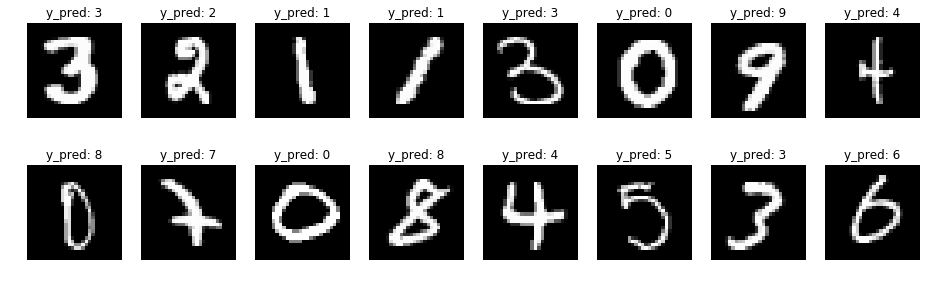

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

test_batch_size = 16
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)
batch_xs = test_data[batch_index]
y_pred = sess.run(logits, feed_dict={x: batch_xs, is_training: False})

fig = plt.figure(figsize=(16, 10))
for i, (px, py) in enumerate(zip(batch_xs, y_pred)):
  p = fig.add_subplot(4, 8, i+1)
  p.set_title("y_pred: {}".format(np.argmax(py)))
  p.imshow(px.reshape(28, 28), cmap='gray')
  p.axis('off')